In [1]:
#import all libraries
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer

In [2]:
# load the datasets
trainingData = pd.read_csv("../titanic/train.csv")


In [3]:
# viewing the data sample
trainingData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
trainingData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
trainingData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Label Encoder for 'Embarked'#
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
imputer = SimpleImputer(strategy='constant', fill_value=0)

#Fill missing values b4 encoding
trainingData['Embarked'] = trainingData['Embarked'].fillna('C')

#encode 'Embarked' column
trainingData['Embarked'] = label_encoder.fit_transform(trainingData['Embarked'])

trainingData['Embarked'].unique()

array([2, 0, 1])

In [7]:
# show all columns

X = ['Survived', 'Pclass', 'Age', 'SibSp','Sex',
       'Parch', 'Fare', 'Embarked']
X_features = trainingData[X]

X_features_encoded = pd.get_dummies(trainingData[X], drop_first=True)

X_features_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,0,3,22.0,1,0,7.2500,2,True
1,1,1,38.0,1,0,71.2833,0,False
2,1,3,26.0,0,0,7.9250,2,False
3,1,1,35.0,1,0,53.1000,2,False
4,0,3,35.0,0,0,8.0500,2,True


Text(0.5, 1.0, 'Correlation Heatmap')

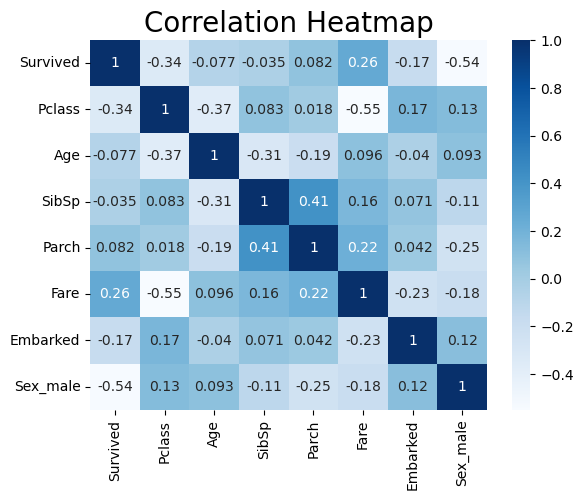

In [8]:
#correlation heatmap
heatmap =  sns.heatmap(X_features_encoded.corr(), cmap = "Blues", annot = True)
heatmap.set_title("Correlation Heatmap", fontdict={'fontsize':20})

In [9]:
#feature selection
"""
    Pclass : rejected
    Age : Rejected
    SibSp : Rejected
    Fare : Accepted
    Parch: Accepted
    Sex: Accepted
    Embarked: Accepted
"""

#rename column back
X_features_encoded = X_features_encoded.rename(columns={'Sex_male' : 'Sex'})


Final_X = ['Pclass','Sex','Fare','Embarked']
Final_X_features = X_features_encoded[Final_X]
Y = trainingData['Survived']

Final_X_features

,Pclass,Sex,Fare,Embarked
0,3,True,7.2500,2
1,1,False,71.2833,0
2,3,False,7.9250,2
3,1,False,53.1000,2
4,3,True,8.0500,2
...,...,...,...,...
886,2,True,13.0000,2
887,1,False,30.0000,2
888,3,False,23.4500,2
889,1,True,30.0000,0


In [10]:
#seperate the testing data
testingData = pd.read_csv("../titanic/test.csv")
testX_features = ['Pclass','Sex','Fare', 'Embarked']
testX = testingData[testX_features]

#encode the ['Embarked']
testX['Embarked'] = testX['Embarked'].fillna('C')

testX['Embarked'] = label_encoder.fit_transform(testX['Embarked'])

#get_dummies for testing data too
testX_encoded = pd.get_dummies(testX, drop_first=True)

#rename the coulmn
testX_encoded = testX_encoded.rename(columns={'Sex_male':'Sex'})

#reorder the coulmns to match the fitting data
testX_encoded = testX_encoded[Final_X_features.columns]
testX_encoded

C:\Users\heroh\AppData\Local\Temp\ipykernel_15904\3541646738.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testX['Embarked'] = testX['Embarked'].fillna('C')
C:\Users\heroh\AppData\Local\Temp\ipykernel_15904\3541646738.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testX['Embarked'] = label_encoder.fit_transform(testX['Embarked'])


,Pclass,Sex,Fare,Embarked
0,3,True,7.8292,1
1,3,False,7.0000,2
2,2,True,9.6875,1
3,3,True,8.6625,2
4,3,False,12.2875,2
...,...,...,...,...
413,3,True,8.0500,2
414,1,False,108.9000,0
415,3,True,7.2500,2
416,3,True,8.0500,2


In [11]:
#impute the testX
imputer = SimpleImputer(strategy='constant', fill_value=0)

testX_encoded = pd.DataFrame(imputer.fit_transform(testX_encoded), columns = testX_encoded.columns)
Final_X_features = pd.DataFrame(imputer.fit_transform(Final_X_features), columns = Final_X_features.columns)

print("Null Values after imputation: ")
testX_encoded
#Final_X_features

Null Values after imputation: 


,Pclass,Sex,Fare,Embarked
0,3.0,1.0,7.8292,1.0
1,3.0,0.0,7.0000,2.0
2,2.0,1.0,9.6875,1.0
3,3.0,1.0,8.6625,2.0
4,3.0,0.0,12.2875,2.0
...,...,...,...,...
413,3.0,1.0,8.0500,2.0
414,1.0,0.0,108.9000,0.0
415,3.0,1.0,7.2500,2.0
416,3.0,1.0,8.0500,2.0


In [12]:
#Scaliing the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
final_X_features_scaled = scaler.fit_transform(Final_X_features)
testX_scaled = scaler.transform(testX_encoded)

In [13]:
#Decision Tree classifier model
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(Final_X_features, Y)

preds2 = model2.predict(testX_encoded)
print(preds2)

[0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 0 1 1 0 0 1 0 0 0]


In [14]:
#check accuracy
trueResults = pd.read_csv("../titanic/gender_submission.csv")
testY = trueResults['Survived']
conf1 = confusion_matrix(testY, preds2)
accu1 = accuracy_score(testY, preds2)
mae1 = mean_absolute_error(preds2, testY)

In [15]:
print("MODEL: Decision Tree Classifier")
print(f"Confusion Matrix : \n {conf1}")
print(f"Accuracy Score : {accu1}")
print(f"Mean Absolute Error : {mae1}")

MODEL: Decision Tree Classifier
Confusion Matrix : 
 [[245  21]
 [ 33 119]]
Accuracy Score : 0.8708133971291866
Mean Absolute Error : 0.1291866028708134


In [16]:
#Random Forest classifier model
from sklearn.ensemble import RandomForestClassifier

In [17]:
#model 3
#best max_leaf_nodes amount = 15
model3 = RandomForestClassifier(max_leaf_nodes=3, random_state=42)

#fitting
model3.fit(Final_X_features, Y)

#predictions
preds3 = model3.predict(testX_encoded)
print(preds3)

#confusion matrix and accuracy score
conf2 = confusion_matrix(testY,preds3)
accu2 = accuracy_score(testY, preds3)
mae2 = mean_absolute_error(preds3, testY)

[0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 0]


In [18]:
print("MODEL: Random Forest Classifier")
print(f"Confusion Matrix : \n {conf2}")
print(f"Accuracy Score : {accu2}")
print(f"Mean Absolute Error : {mae2}")

MODEL: Random Forest Classifier
Confusion Matrix : 
 [[266   0]
 [ 42 110]]
Accuracy Score : 0.8995215311004785
Mean Absolute Error : 0.10047846889952153


In [19]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [20]:
#model 4
model4 = LogisticRegression(
    random_state=42,
    solver='lbfgs', #best solver for small datasets
    max_iter=1000, #Increase iterations for better convergence
    C=1.0, #Inverse of regularix=zation strength (smaller = stronger)
    penalty='l2', #Ridge Regularization
    class_weight='balanced' #Adjusts weight inversely proportional to class frequencies
)

model4.fit(Final_X_features, Y)

preds4 = model4.predict(testX_encoded)
print(preds4)

#metrics
conf3 = confusion_matrix(testY, preds4)
accu3 = accuracy_score(testY, preds4)
mae3 = mean_absolute_error(testY, preds4)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 1 1 1 1 1 0 1 0 0 0]


In [21]:
print("MODEL: Logistic Regression")
print(f"Confusion Matrix : \n {conf3}")
print(f"Accuracy Score : {accu3}")
print(f"Mean Absolute Error : {mae3}")

MODEL: Logistic Regression
Confusion Matrix : 
 [[233  33]
 [  0 152]]
Accuracy Score : 0.9210526315789473
Mean Absolute Error : 0.07894736842105263


In [22]:
#Support Vector Machine
from sklearn import svm

In [23]:
model5 = svm.SVC(kernel='rbf',C = 500.0, gamma='scale')

model5.fit(Final_X_features, Y)

preds5 = model5.predict(testX_encoded)
print(preds5)

#metrics
conf4 = confusion_matrix(testY, preds5)
accu4 = accuracy_score(testY, preds5)
mae4 = mean_absolute_error(testY, preds5)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [24]:
print("MODEL: SVM")
print(f"Confusion Matrix : \n {conf4}")
print(f"Accuracy Score : {accu4}")
print(f"Mean Absolute Error : {mae4}")

MODEL: SVM
Confusion Matrix : 
 [[260   6]
 [  0 152]]
Accuracy Score : 0.9856459330143541
Mean Absolute Error : 0.014354066985645933
